In [2]:
"""
Read wrk folder for *.summary.xlsx
  extract warming and cooling data for all variables
  save and plot
  
  Mingsong Li
  Oct 12, 2020
"""
import os
import pandas
import matplotlib.pyplot as plt
from sys import platform as sys_pf
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")
    import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np


## User defined start

xlsxdir = '/mnt/c/Users/mul450/Dropbox/git/deepDA/mlwrk/wrk/'
exportxlsx = 1
plotdata = 1

blacklist = ['petmproxy3slices_v0.0.18hiatus.csv_petm17_v18h_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus.csv_petm18_v18h_2021011_ca_e400_100mc.summary.xlsx',
            'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021011_ca_e400_100mc.summary.xlsx',
            'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e100_100mc.summary.xlsx',
            'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx',
             'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_all_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_all_100mc.summary.xlsx',
             'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e100_100mc.summary.xlsx',
             'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx',
             'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e400_100mc.summary.xlsx'
            ]
whitelist17 =[
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc.summary.xlsx',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_mg_100mc.summary.xlsx',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_o_100mc.summary.xlsx',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_tex_100mc.summary.xlsx',
        #'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2021012_TOM_MC100seed-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021012_TOM_MC100seed.summary.xlsx',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_all_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_all_e400_MC100seed.summary.xlsx',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_ca_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_ca_e400_MC100seed.summary.xlsx',
        #'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx'
        ]

whitelist18 =[
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_tex_100mc.summary.xlsx',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_o_100mc.summary.xlsx',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_mg_100mc.summary.xlsx',
        #'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2021012_TOM_MC100seed-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021012_TOM_MC100seed.summary.xlsx',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_all_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_all_e400_MC100seed.summary.xlsx',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_ca_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_ca_e400_MC100seed.summary.xlsx',
        #'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx'
        ]

dict0 ={
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx': 'SST', 
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_tex_100mc.summary.xlsx': u'TEX\u2088\u2086',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_o_100mc.summary.xlsx':'\u03B4\u00B9\u2078O',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_mg_100mc.summary.xlsx':'Mg/Ca',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc.summary.xlsx':'SST',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_mg_100mc.summary.xlsx':'Mg/Ca',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_o_100mc.summary.xlsx':'\u03B4\u00B9\u2078O',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_tex_100mc.summary.xlsx':u'TEX\u2088\u2086',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e100_100mc.summary.xlsx': 'All',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e400_100mc.summary.xlsx':'All',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_all_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_all_e400_MC100seed.summary.xlsx':'All',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e100_100mc.summary.xlsx':'CaCO\u2083',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx':'CaCO\u2083',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_ca_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_ca_e400_MC100seed.summary.xlsx':'CaCO\u2083',
        'petmproxy3slices_v0.0.18hiatus.csv_petm17_v18h_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus.csv_petm18_v18h_2021011_ca_e400_100mc.summary.xlsx':'CaCO\u2083',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021011_ca_e400_100mc.summary.xlsx':'CaCO\u2083',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_all_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_all_100mc.summary.xlsx':'h2alldf',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx':'h2TOMdf',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2021012_TOM_MC100seed-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021012_TOM_MC100seed.summary.xlsx':'h2TOMdfsd',
    }

# old version of dict0, unused

dict1 ={
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx': 'p18TOM', 
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_tex_100mc.summary.xlsx': 'p18TEX',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_o_100mc.summary.xlsx':'p18O',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_mg_100mc.summary.xlsx':'p18Mg',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc.summary.xlsx':'p17TOM',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_mg_100mc.summary.xlsx':'p17Mg',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_o_100mc.summary.xlsx':'p17O',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_tex_100mc.summary.xlsx':'p17TEX',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e100_100mc.summary.xlsx': '18alldf',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e400_100mc.summary.xlsx':'18alldfe',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_all_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_all_e400_MC100seed.summary.xlsx':'18alldfesd',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e100_100mc.summary.xlsx':'18Ca100df',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx':'18Cadfe',
        'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_ca_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_ca_e400_MC100seed.summary.xlsx':'18Cadfesd',
        'petmproxy3slices_v0.0.18hiatus.csv_petm17_v18h_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus.csv_petm18_v18h_2021011_ca_e400_100mc.summary.xlsx':'hCadfe',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021011_ca_e400_100mc.summary.xlsx':'h2Cadfe',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_all_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_all_100mc.summary.xlsx':'h2alldf',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx':'h2TOMdf',
        'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2021012_TOM_MC100seed-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021012_TOM_MC100seed.summary.xlsx':'h2TOMdfsd',
    }

## User defined end
pwd = os.getcwd()
df = pandas.DataFrame()
dfcool = pandas.DataFrame()

for file in os.listdir(xlsxdir):
    if file.endswith(".summary.xlsx"):
        filefull = os.path.join(xlsxdir, file)        
        excel = pandas.read_excel(filefull, index_col=0)
        
        if excel['label'].str.contains('warming').any():
            #print(file)
            #print ("warming detected")
            
            df0 = pandas.DataFrame({'file':[file]},index = range(1))
            
            df1 = pandas.concat([df0]*7, ignore_index=True)
            
            df2 = excel[excel['label'].str.contains('warming', na=False)]
            df3 = pandas.concat([df1,df2],axis=1)
            #df2['field'] = df2['field'].str.repeat(file)
            df = pandas.concat([df,df3])
            
        if excel['label'].str.contains('cooling').any():            
            df0 = pandas.DataFrame({'file':[file]},index = range(1))            
            df1 = pandas.concat([df0]*7, ignore_index=True)            
            df2 = excel[excel['label'].str.contains('cooling', na=False)]
            df3 = pandas.concat([df1,df2],axis=1)
            dfcool = pandas.concat([dfcool,df3])

#print(df)
df = df.sort_index()
dfcool = dfcool.sort_index()

print('Okay')

Okay


/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

saved @
/mnt/c/Users/mul450/Dropbox/git/deepDA/mlwrk/wrk/whitesum.18.warming.xlsx


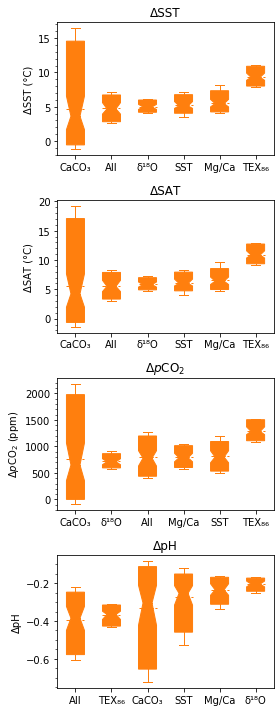

In [13]:
# warming / cooling plot and data saving

warmcool = 'warming'
#warmcool = 'cooling'
#whiteblack = 'black'  # using black list
whiteblack = 'white'   # using white list
priorset = 18    # prior using PETM017 or PETM018

if warmcool == 'cooling':
    colori = 'C2'
    figsizei = (3,10)
elif warmcool == 'warming':
    colori = 'C1'
    figsizei = (4,10)
    
if priorset == 17:
    whitelist = whitelist17
else:
    whitelist = whitelist18
    
warmfig = xlsxdir+whiteblack+'.sum.'+str(priorset)+'.'+warmcool+'.pdf'
fullname = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+warmcool+'.xlsx'
fullused = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+warmcool+'.used.xlsx'

dfused = pandas.DataFrame()  # save used data

if plotdata == 1:    
    fig, axes = plt.subplots(nrows=4, ncols=1,figsize=figsizei)
    
    for loci in range(7):
        if loci in [3,5,6]:
            continue
        if warmcool == 'cooling':
            result = dfcool.loc[loci]
        elif warmcool == 'warming':
            result = df.loc[loci]
        a_list = []
        result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
            
            df4 = result.iloc[ki]
            df4['proxy'] = dict0[filei]
            if loci == 0:
                df4['field'] = 'dSST'                
            elif loci == 1:
                df4['field'] = 'dSAT'
            elif loci == 2:
                df4['field'] = 'dCO2'
            elif loci == 4:
                df4['field'] = 'dpH'
            dfused = pandas.concat([dfused,df4],sort=False,axis=1)
            #dfused = pandas.concat([dfused,result],sort=False,axis=1)
        #print(a_list)
        
        if loci == 0:
            axes[0].set_title('\u0394SST')
            axes[0].set_ylabel('\u0394SST (\u00B0C)')
            bp = axes[0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
        elif loci == 1:
            axes[1].set_title('\u0394SAT')
            axes[1].set_ylabel('\u0394SAT (\u00B0C)')
            bp = axes[1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
        elif loci == 2:
            axes[2].set_title('\u0394$\it{p}$CO$_2$')
            axes[2].set_ylabel('\u0394$\it{p}$CO$_2$ (ppm)')
            bp = axes[2].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[2].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
        elif loci == 4:
            axes[3].set_title('\u0394pH')
            axes[3].set_ylabel('\u0394pH')
            bp = axes[3].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[3].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
        #fig.subplots_adjust(hspace=0.2)
        fig.tight_layout()
    fig.savefig(warmfig)
    
if exportxlsx == 1:
    dfused=dfused.transpose()
    #dfused = dfused.sort_index()
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)
    dfused.to_excel(fullused)

/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

saved @
/mnt/c/Users/mul450/Dropbox/git/deepDA/mlwrk/wrk/sum.17.cooling.xlsx


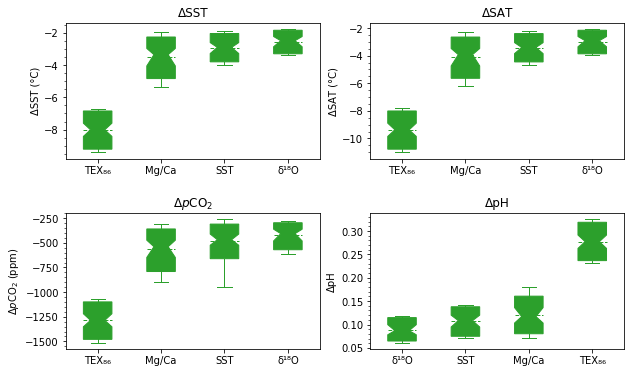

In [140]:
# cooling plot and data saving

#whiteblack = 'black'  # using black list
whiteblack = 'white'   # using white list
priorset = 17    # prior using PETM017 or PETM018

if priorset == 17:
    whitelist = whitelist17
    warmfig = xlsxdir+whiteblack+'.17.sum.cooling.pdf'
    fullname = xlsxdir+'sum.17.cooling.xlsx'
    fullused = xlsxdir+'sum.17.cooling.used.xlsx'
else:
    whitelist = whitelist18
    warmfig = xlsxdir+whiteblack+'.18.sum.cooling.pdf'
    fullname = xlsxdir+'sum.18.cooling.xlsx'
    fullused = xlsxdir+'sum.18.cooling.used.xlsx'

dfused = pandas.DataFrame()  # save used data

if plotdata == 1:
    
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,6))
    
    for loci in range(7):
        if loci in [3,5,6]:
            continue
        result = dfcool.loc[loci]
        a_list = []
        result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
            
            df4 = result.iloc[ki]
            df4['proxy'] = dict0[filei]
            if loci == 0:
                df4['field'] = 'dSST'                
            elif loci == 1:
                df4['field'] = 'dSAT'
            elif loci == 2:
                df4['field'] = 'dCO2'
            elif loci == 4:
                df4['field'] = 'dpH'
            dfused = pandas.concat([dfused,df4],sort=False,axis=1)
            #dfused = pandas.concat([dfused,result],sort=False,axis=1)
        #print(a_list)
        
        if loci == 0:
            axes[0,0].set_title('\u0394SST')
            axes[0,0].set_ylabel('\u0394SST (\u00B0C)')
            bp = axes[0,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        elif loci == 1:
            axes[0,1].set_title('\u0394SAT')
            axes[0,1].set_ylabel('\u0394SAT (\u00B0C)')
            bp = axes[0,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        elif loci == 2:
            axes[1,0].set_title('\u0394$\it{p}$CO$_2$')
            axes[1,0].set_ylabel('\u0394$\it{p}$CO$_2$ (ppm)')
            bp = axes[1,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        elif loci == 4:
            axes[1,1].set_title('\u0394pH')
            axes[1,1].set_ylabel('\u0394pH')
            bp = axes[1,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        fig.subplots_adjust(hspace=0.4)
        
    fig.savefig(warmfig)
    
if exportxlsx == 1:
    dfused=dfused.transpose()
    #dfused = dfused.sort_index()
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)
    dfused.to_excel(fullused)

In [ ]:
# warming plot and data saving

#whiteblack = 'black'  # using black list
whiteblack = 'white'   # using white list
priorset = 17    # prior using PETM017 or PETM018

if priorset == 17:
    whitelist = whitelist17
    warmfig = xlsxdir+whiteblack+'.17.ca.sum.warming.pdf'
    fullname = xlsxdir+'sum.17.ca.warming.xlsx'
else:
    whitelist = whitelist18
    warmfig = xlsxdir+whiteblack+'.18.ca.sum.warming.pdf'
    fullname = xlsxdir+'sum.18.ca.warming.xlsx'

if plotdata == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,6))
    
    for loci in range(7):
        if loci in [3,5,6]:
            continue
        result = df.loc[loci]
        a_list = []
        result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
        #print(a_list)
    
        if loci == 0:
            axes[0,0].set_title('\u0394SST')
            axes[0,0].set_ylabel('\u0394SST (\u00B0C)')
            bp = axes[0,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        elif loci == 1:
            axes[0,1].set_title('\u0394SAT')
            axes[0,1].set_ylabel('\u0394SAT (\u00B0C)')
            bp = axes[0,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        elif loci == 2:
            axes[1,0].set_title('\u0394$\it{p}$CO$_2$')
            axes[1,0].set_ylabel('\u0394$\it{p}$CO$_2$ (ppm)')
            bp = axes[1,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        elif loci == 4:
            axes[1,1].set_title('\u0394pH')
            axes[1,1].set_ylabel('\u0394pH')
            bp = axes[1,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        fig.subplots_adjust(hspace=0.4)
        
    fig.savefig(warmfig)
        
if exportxlsx == 1:
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)

In [ ]:

    

        if loci == 0:
            ax.set_title('\u0394SST (\u00B0C)')
        elif loci == 1:
            ax.set_title('\u0394SAT (\u00B0C)')
        elif loci == 2:
            ax.set_title('\u0394$\it{p}$CO$_2$ (ppm)')
        elif loci == 4:
            ax.set_title('\u0394pH')      

if exportxlsx == 1:
    print('saved @')
    fullname = xlsxdir+'sum.cooling.xlsx'
    print(fullname)
    dfcool.to_excel(fullname)

In [ ]:
## Old version of previous block

whiteblack = 'white'
whitelist = whitelist17
#whitelist = whitelist18
#whiteblack = 'black'

if plotdata == 1:
    for loci in range(7):
        if loci in [3,5,6]:
            continue
        result = df.loc[loci]
        a_list = []
        result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
        #print(a_list)
        
        fig, ax = plt.subplots(figsize=(8,4))
        bp = ax.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
        #bp = ax.bxp(a_list, showmeans=True,meanline=True, positions=range(len(a_list)))
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # Colour the lines in the boxplot blue
        for element in bp.keys():
            plt.setp(bp[element], color='C1')
        

        if loci == 0:
            ax.set_title('\u0394SST (\u00B0C)')
        elif loci == 1:
            ax.set_title('\u0394SAT (\u00B0C)')
        elif loci == 2:
            ax.set_title('\u0394$\it{p}$CO$_2$ (ppm)')
        elif loci == 4:
            ax.set_title('\u0394pH')

Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e100_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e400_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_all_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_all_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e100_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18hiatus.csv_petm17_v18h_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus.csv_petm18_v18h_202

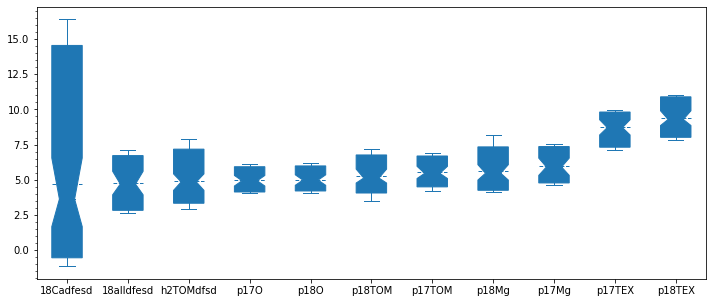

In [4]:
if plotdata == 1:    
    result = df.loc[0] 
    
    a_list = []
    result = result.sort_values(by=['median'])
    result.index = np.arange(0,len(result)).tolist()
    #print(result)
    
    for ki in range(len(result)):
        
        filei = result['file'][ki]
        if filei in blacklist:
            print('Skip {}'.format(filei))
            continue
        rowi = {'label': dict0[filei],
                'mean': result['mean'][ki], 
                'q1': result['5%'][ki], 
                'q3': result['95%'][ki], 
                'cilo': result['25%'][ki], 
                'med': result['median'][ki], 
                'cihi': result['75%'][ki],
                'iqr': result['75%'][ki] - result['25%'][ki], 
                'whislo': result['2.5%'][ki], 
                'whishi': result['97.5%'][ki], 
                'fliers': [np.nan]}
        
        rowi_copy = rowi.copy()
        a_list.append(rowi_copy)
    #print(a_list)


    fig, ax = plt.subplots(figsize=(12,5))

    bp = ax.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
    #bp = ax.bxp(a_list, showmeans=True,meanline=True, positions=range(len(a_list)))

    # Colour the lines in the boxplot blue
    for element in bp.keys():
        plt.setp(bp[element], color='C0')
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    #print(result['file'])

In [ ]:
rowi = {#'label': str(ki),
                'label': dict0[filei],
                'mean': result['mean'][ki], 
                'q1': result['25%'][ki], 
                'med': result['median'][ki], 
                'q3': result['75%'][ki],
                'iqr': result['75%'][ki] - result['25%'][ki], 
                'cilo': result['2.5%'][ki], 
                'cihi': result['97.5%'][ki], 
                'whislo': result['5%'][ki], 
                'whishi': result['95%'][ki], 
                'fliers': [np.nan]}

In [ ]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
    bp = ax.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
    #bp = ax.bxp(a_list, showmeans=True,meanline=True, positions=range(len(a_list)))
    # Colour the lines in the boxplot blue
    for element in bp.keys():
        plt.setp(bp[element], color='C0')
    axes[0,0].yaxis.set_minor_locator(AutoMinorLocator())
    
    if loci == 0:
        ax.set_title('\u0394SST (\u00B0C)')
    elif loci == 1:
        ax.set_title('\u0394SAT (\u00B0C)')
    elif loci == 2:
        ax.set_title('\u0394$\it{p}$CO$_2$ (ppm)')
    elif loci == 4:
        ax.set_title('\u0394pH')
    #bp = axes[0,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))

       2.5%        5%       25%     median        75%        95%      97.5%
0  2.317950  2.613131  3.571773   4.325117   5.132103   6.504773   7.459739
0  3.509363  4.055639  4.765696   5.122781   5.754438   6.761597   7.188854
0  7.820478  8.016628  8.855636   9.289579   9.902816  10.895213  11.015216
0  3.694171  4.392601  6.517522   8.600277  11.612267  19.533465  21.490248
0  4.078326  4.201553  4.604086   4.973091   5.350308   5.981518   6.188651
0  5.645052  6.226501  8.450278  10.265462  13.370102  21.224034  23.090290
0 -1.587343 -0.599164  1.464223   3.573122   6.644906  14.429245  16.437015
0  2.054631  2.379213  3.847334   4.841913   5.839884   7.912980   8.350005
0  3.491069  3.958159  4.983769   5.818744   6.936614   8.662124  10.333409
0 -3.030437 -1.877576  3.092854   7.059956  11.182971  20.735957  23.447071
0  4.201211  4.492010  5.086149   5.453106   5.953813   6.688246   6.865991
0  4.631879  4.771879  5.311154   5.907766   6.536100   7.358716   7.576161
0  4.025190 

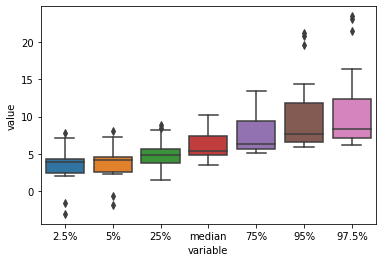

In [ ]:

print(pwd)

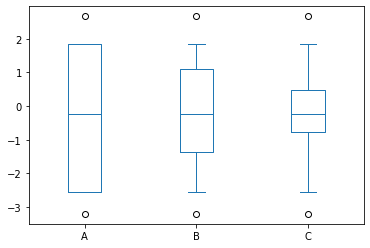

In [55]:
stats['A']

{'label': 'A',
 'mean': -0.1466251162276963,
 'iqr': 1.2563858621511241,
 'cilo': -0.4227522899438978,
 'cihi': -0.028247129228444773,
 'whishi': 1.8389970992813731,
 'whislo': -2.5593845214816455,
 'fliers': array([-3.20504023,  2.67217242]),
 'q1': -2.5658410785952266,
 'med': -0.22549970958617127,
 'q3': 1.8473288524666114}

In [56]:
stats['B']

{'label': 'B',
 'mean': -0.1466251162276963,
 'iqr': 1.2563858621511241,
 'cilo': -0.4227522899438978,
 'cihi': -0.028247129228444773,
 'whishi': 1.8389970992813731,
 'whislo': -2.5593845214816455,
 'fliers': array([-3.20504023,  2.67217242]),
 'q1': -1.3613807991203901,
 'med': -0.22549970958617127,
 'q3': 1.0902518848872687}